# Vector space semantics

## Session 03: Dimensionality reduction

### Gerhard Jäger


May 9, 2022

(partially based on slides by Katrin Erk, https://www.katrinerk.com/courses/lin350-computational-semantics, with kind permission)

# Using a somewhat larger corpus

We next demonstrate a somewhat larger corpus, with yet another method of accessing the corpus data: If the data is available within the NLTK corpora, you can use the NLTK's corpus reader to access it.

The Brown corpus is a 1 million word corpus of carefully selected text pieces from different genres, originally made to support dictionary-makers, so it's intended to cover a broad variety of genres in English.

In [1]:
import string
import nltk
import pandas as pd
import numpy as np
import scipy

In [2]:
nltk.download('brown')
print("The first few sentences of the Brown corpus:\n")
for s in nltk.corpus.brown.sents()[:3]: 
    print(s, "\n")

The first few sentences of the Brown corpus:

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'] 

['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'] 

['The', 'September-October', 'term', 'jury', 'had', 'been', 'charged', 'by', 'Fulton', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr.', '.'] 



[nltk_data] Downloading package brown to /home/gjaeger/nltk_data...
[nltk_data]   Package brown is already up-to-date!


We compute the target/context counts, noting context items as we go. We only count words that appear at least 10 times in the corpus. This cuts down a lot on the size of our matrix.

In [3]:
brown_wordcounts = nltk.FreqDist(nltk.corpus.brown.words())
brown_wordcounts.most_common(20)

[('the', 62713),
 (',', 58334),
 ('.', 49346),
 ('of', 36080),
 ('and', 27915),
 ('to', 25732),
 ('a', 21881),
 ('in', 19536),
 ('that', 10237),
 ('is', 10011),
 ('was', 9777),
 ('for', 8841),
 ('``', 8837),
 ("''", 8789),
 ('The', 7258),
 ('with', 7012),
 ('it', 6723),
 ('as', 6706),
 ('he', 6566),
 ('his', 6466)]

## remove punctuation and stopwords

In [4]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = np.unique(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gjaeger/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all',
       'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at',
       'be', 'because', 'been', 'before', 'being', 'below', 'between',
       'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did',
       'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don',
       "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further',
       'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
       "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him',
       'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn',
       "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma',
       'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't",
       'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o',
       'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours',
       'ourselves', 'out', 'over', 'own', 're', 's', 'same

In [5]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
def normalize_wordlist(wl):
    wl = [w.lower().strip(string.punctuation) for w in wl]
    return [w for w in wl if w != "" and not w in stop_words]


In [7]:
brown_words = normalize_wordlist(nltk.corpus.brown.words())
brown_words[:40]

['fulton',
 'county',
 'grand',
 'jury',
 'said',
 'friday',
 'investigation',
 "atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 'evidence',
 'irregularities',
 'took',
 'place',
 'jury',
 'said',
 'term-end',
 'presentments',
 'city',
 'executive',
 'committee',
 'over-all',
 'charge',
 'election',
 'deserves',
 'praise',
 'thanks',
 'city',
 'atlanta',
 'manner',
 'election',
 'conducted',
 'september-october',
 'term',
 'jury',
 'charged',
 'fulton',
 'superior']

In [8]:
brown_wordcounts = nltk.FreqDist(brown_words)
brown_wordcounts.most_common(40)

[('one', 3297),
 ('would', 2714),
 ('said', 1961),
 ('new', 1635),
 ('could', 1601),
 ('time', 1598),
 ('two', 1412),
 ('may', 1402),
 ('first', 1361),
 ('like', 1292),
 ('man', 1207),
 ('even', 1170),
 ('made', 1125),
 ('also', 1069),
 ('many', 1030),
 ('must', 1013),
 ('af', 996),
 ('back', 966),
 ('years', 958),
 ('much', 937),
 ('way', 909),
 ('well', 897),
 ('people', 847),
 ('mr', 844),
 ('little', 831),
 ('state', 807),
 ('good', 806),
 ('make', 794),
 ('world', 787),
 ('still', 782),
 ('see', 772),
 ('men', 763),
 ('work', 762),
 ('long', 753),
 ('get', 749),
 ('life', 715),
 ('never', 697),
 ('day', 687),
 ('another', 684),
 ('know', 683)]

In [9]:
from matplotlib import pylab as plt

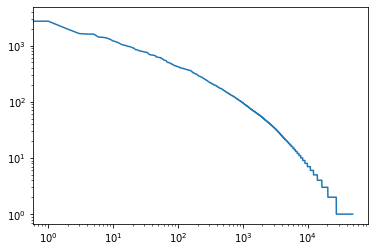

In [18]:
plt.loglog(sorted(brown_wordcounts.values(), reverse=True))

In [19]:
brown_sents = [normalize_wordlist(s) for s in nltk.corpus.brown.sents()]
brown_sents = [s for s in brown_sents if len(s) > 0]
brown_sents[:4]

[['fulton',
  'county',
  'grand',
  'jury',
  'said',
  'friday',
  'investigation',
  "atlanta's",
  'recent',
  'primary',
  'election',
  'produced',
  'evidence',
  'irregularities',
  'took',
  'place'],
 ['jury',
  'said',
  'term-end',
  'presentments',
  'city',
  'executive',
  'committee',
  'over-all',
  'charge',
  'election',
  'deserves',
  'praise',
  'thanks',
  'city',
  'atlanta',
  'manner',
  'election',
  'conducted'],
 ['september-october',
  'term',
  'jury',
  'charged',
  'fulton',
  'superior',
  'court',
  'judge',
  'durwood',
  'pye',
  'investigate',
  'reports',
  'possible',
  'irregularities',
  'hard-fought',
  'primary',
  'mayor-nominate',
  'ivan',
  'allen',
  'jr'],
 ['relative',
  'handful',
  'reports',
  'received',
  'jury',
  'said',
  'considering',
  'widespread',
  'interest',
  'election',
  'number',
  'voters',
  'size',
  'city']]

In [20]:
(len(brown_sents), sum([len(s) for s in brown_sents]), len(np.unique(brown_words)))

(56831, 537755, 49039)

In [21]:
def each_contextword_1wordwindow(wordlist, targetindex):
    if targetindex > 0:
        # preceding word
        yield wordlist[targetindex - 1]
        
    if targetindex < len(wordlist)- 1:
        # succeeding word
        yield wordlist[targetindex + 1]
        

In [22]:
brown_context_counts = nltk.ConditionalFreqDist()

frequency_threshold = 20

for sentence in brown_sents:
    
    for targetindex, target in enumerate(sentence):
        for contextword in each_contextword_1wordwindow(sentence, targetindex):
            if brown_wordcounts[target] >= frequency_threshold and brown_wordcounts[contextword] >= frequency_threshold:
                brown_context_counts[target][contextword] += 1   


For this larger corpus, it now makes sense to look at some context word counts to get a sense of what the tables of counts tell us. 

In [23]:
# 10 most frequent context words: similar across many items
# (what can we do about that?)
print("10 most frequent contexts for some targets:\n")
print("election:\n", brown_context_counts["election"].most_common(10))
print("love:\n", brown_context_counts["love"].most_common(10))
print("car:", brown_context_counts["car"].most_common(10))

10 most frequent contexts for some targets:

election:
 [('day', 5), ('presidential', 5), ('results', 4), ('board', 3), ('primary', 2), ('interest', 2), ('ever', 2), ('campaign', 2), ('judges', 2), ('last', 2)]
love:
 [('god', 8), ('way', 6), ('us', 5), ('know', 4), ('faith', 4), ('country', 4), ('true', 4), ('give', 3), ("mother's", 3), ('fell', 3)]
car: [('police', 7), ('got', 7), ('parked', 7), ('big', 6), ('drive', 6), ('approaching', 5), ('driving', 5), ('driven', 5), ('motor', 5), ('coming', 5)]


In [24]:
# 100 most frequent context words
# We see that many of the 100 most frequent context words only have counts of one.
print("100 most frequent contexts for some targets:\n")
print("election:\n", brown_context_counts["election"].most_common(100))
print("love:\n", brown_context_counts["love"].most_common(100))
print("car:\n", brown_context_counts["car"].most_common(100))

100 most frequent contexts for some targets:

election:
 [('day', 5), ('presidential', 5), ('results', 4), ('board', 3), ('primary', 2), ('interest', 2), ('ever', 2), ('campaign', 2), ('judges', 2), ('last', 2), ('november', 2), ('since', 2), ('close', 2), ('april', 2), ('year', 2), ('produced', 1), ('charge', 1), ('manner', 1), ('conducted', 1), ('number', 1), ('registration', 1), ('laws', 1), ('back', 1), ('city', 1), ('general', 1), ('leading', 1), ('quiet', 1), ('scheduled', 1), ('orderly', 1), ('8', 1), ('involved', 1), ('investigation', 1), ('attorney', 1), ('told', 1), ('possible', 1), ('nine', 1), ('special', 1), ('might', 1), ('mean', 1), ('program', 1), ('think', 1), ('received', 1), ('president', 1), ('right', 1), ('almost', 1), ('pull', 1), ('bond', 1), ('construction', 1), ('came', 1), ('thursday', 1), ('set', 1), ('pick', 1), ('howard', 1), ('declaration', 1), ('man', 1), ('result', 1), ('hand', 1), ('national', 1), ('left', 1), ('whether', 1), ('60', 1), ('religious', 1)

In [25]:
# some ambiguous words
print("Some ambiguous words:")
print("bank:\n", brown_context_counts["bank"].most_common(100))
print("bar:\n", brown_context_counts["bar"].most_common(100))
print("leave:\n", brown_context_counts["leave"].most_common(100))

Some ambiguous words:
bank:
 [('washington', 7), ('national', 3), ('prepared', 3), ('west', 3), ('red', 2), ('french', 2), ('new', 2), ('local', 2), ('south', 2), ('held', 2), ('east', 2), ('manchester', 2), ('edge', 2), ('river', 2), ('take', 1), ('accounts', 1), ('confidence', 1), ('customers', 1), ('also', 1), ('even', 1), ('savings', 1), ('chicago', 1), ('first', 1), ('jersey', 1), ('installed', 1), ('visited', 1), ('march', 1), ('people', 1), ('said', 1), ('touch', 1), ('reserve', 1), ('done', 1), ('policy', 1), ('make', 1), ('cloud', 1), ('hope', 1), ('representative', 1), ('end', 1), ('would', 1), ('world', 1), ('firm', 1), ('later', 1), ('handling', 1), ('sighed', 1), ('president', 1), ('destroy', 1), ('southern', 1), ('approval', 1), ('contact', 1), ('commerce', 1), ('officials', 1), ('cash', 1), ('may', 1), ('loans', 1), ('whether', 1), ('received', 1), ('manhattan', 1), ('providence', 1), ('left', 1), ('north', 1), ('put', 1), ('green', 1), ('man', 1), ('brought', 1), ('comi

## Working with numpy matrices

We re-compute the whole space as a matrix, this time using numpy, because this corpus is already too big to fit comfortably into pandas. (Meaning, it takes forever to compute the dataframes.) 

In [26]:
# first determine the list of all words in Brown
# repeat: frequency threshold
frequency_threshold = 20

brown_wordlist = list(w for w in brown_wordcounts if brown_wordcounts[w] >= frequency_threshold)

In [28]:
brown_wordlist[-40:]

['authentic',
 'laura',
 'dolores',
 'leaped',
 'doc',
 'transformation',
 'theories',
 'worries',
 'merchant',
 "christ's",
 'b.c',
 'anyhow',
 'relating',
 'probabilities',
 'impulse',
 'package',
 'pupil',
 'anticipation',
 'slide',
 'fractions',
 'cathy',
 'boots',
 'sauce',
 'mustard',
 'michelangelo',
 'invention',
 'cheek',
 'awake',
 'pursue',
 'peered',
 'crawled',
 'nude',
 'okay',
 'borden',
 'plato',
 'oedipus',
 'lungs',
 'input',
 'suitcase',
 'freddy']

In [29]:
# make a dictionary that maps each word to its index in the wordlist
brown_wordlist_lookup = dict((word, index) for index, word in enumerate(brown_wordlist))

In [30]:
len(brown_wordlist)

4844

In [31]:
# We need an array with enough space to hold 
# len(brown_wordlist) target words, and
# len(brown_wordlist) context words.
# We first initialize it to all zeros.
brown_count_matrix = np.zeros((len(brown_wordlist), len(brown_wordlist)))

In [32]:
# Now, let's do the context word counting with this matrix.

for sentence in brown_sents:
    for targetindex, target in enumerate(sentence):
        for contextword in each_contextword_1wordwindow(sentence, targetindex):
            if brown_wordcounts[target] >= frequency_threshold and brown_wordcounts[contextword] >= frequency_threshold:
                # which cell in the matrix is this? 
                # look up both the target and the context word
                # in the ordered list of Brown words
                targetindex_matrix = brown_wordlist_lookup[target]
                contextindex_matrix = brown_wordlist_lookup[contextword]
                # and add a count of one for this cell in the matrix
                brown_count_matrix[targetindex_matrix][contextindex_matrix] += 1   


In [34]:
def cosine_sim(vec1, vec2):
    return 1 - scipy.spatial.distance.cosine(vec1, vec2)

In [35]:
# We can again compute similarity in this space
said_index = brown_wordlist_lookup["said"]
wrote_index = brown_wordlist_lookup["wrote"]
cosine_sim( brown_count_matrix[said_index], brown_count_matrix[wrote_index])

0.2667942904431144

In [44]:
germanySims = [
    cosine_sim(brown_wordlist_lookup['germany'], brown_count_matrix[i])
    for i in range(len(brown_wordlist))
]

In [36]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors_obj = NearestNeighbors(
    n_neighbors=20, metric = scipy.spatial.distance.cosine)

# we then allow it to compute an internal datastructure from our data
nearest_neighbors_obj.fit(brown_count_matrix)

NearestNeighbors(metric=<function cosine at 0x7ff02f4ba0d0>, n_neighbors=20)

In [53]:
cosine_distances, target_indices = nearest_neighbors_obj.kneighbors([brown_count_matrix[said_index]])

In [54]:
import pandas as pd

saidNN = pd.DataFrame(
    np.c_[
        np.array([brown_wordlist[i] for i in [target_indices][0][0]]), 
        1-cosine_distances[0]
    ],
    columns = ['word', 'cosine similarity']
)


In [55]:
saidNN

,word,cosine similarity
0,said,1.0
1,say,0.5927040316696859
2,knew,0.5598563510032091
3,told,0.5548318969148726
4,know,0.5505889042192217
5,never,0.5208856639545308
6,think,0.5117878164407484
7,like,0.5111051872971337
8,probably,0.5080811909281473
9,make,0.506091311427728


In [57]:
def get_nearest_neighbors(word, n_neighbors=40, mtx=brown_count_matrix):
    word_index = brown_wordlist_lookup[word]
    nearest_neighbors_obj = NearestNeighbors(n_neighbors=n_neighbors, metric = scipy.spatial.distance.cosine)
    nearest_neighbors_obj.fit(mtx)
    cosine_distances, target_indices = nearest_neighbors_obj.kneighbors([mtx[word_index]])
    wordNN = pd.DataFrame(
        np.c_[
            np.array([brown_wordlist[i] for i in [target_indices][0][0]]), 
            1-cosine_distances[0]
        ],
        columns = ['word', 'cosine similarity']
    )
    return wordNN

In [85]:
get_nearest_neighbors("british")

,word,cosine similarity
0,british,1.0
1,india,0.281258624664281
2,revolution,0.2728452726344607
3,indians,0.24638016499545112
4,german,0.23652495839563303
5,english,0.2210994176307004
6,federal,0.2102673692725232
7,agencies,0.20829402495801297
8,people,0.19814603718924884
9,politics,0.18925125050058678


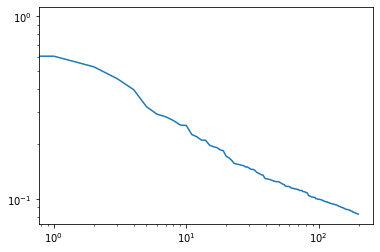

In [72]:
plt.loglog([float(x) for x in  get_nearest_neighbors("germany", 200).values[:,1]])

In [76]:
def each_contextword_2wordwindow(wordlist, targetindex):
    if targetindex > 0:
        # preceding words
        yield wordlist[targetindex - 1]
    if targetindex > 1:
        yield wordlist[targetindex - 2]
        
    if targetindex < len(wordlist)- 1:
        # succeeding words
        yield wordlist[targetindex + 1]
    if targetindex < len(wordlist)- 2:
        # succeeding words
        yield wordlist[targetindex + 2]        
        

In [77]:
brown_context_counts2 = nltk.ConditionalFreqDist()

frequency_threshold = 20

for sentence in brown_sents:
    
    for targetindex, target in enumerate(sentence):
        for contextword in each_contextword_2wordwindow(sentence, targetindex):
            if brown_wordcounts[target] >= frequency_threshold and brown_wordcounts[contextword] >= frequency_threshold:
                brown_context_counts2[target][contextword] += 1   


In [78]:

print("10 most frequent contexts for some targets:\n")
print("election:\n", brown_context_counts2["election"].most_common(10))
print("love:\n", brown_context_counts2["love"].most_common(10))
print("car:", brown_context_counts2["car"].most_common(10))

10 most frequent contexts for some targets:

election:
 [('day', 5), ('presidential', 5), ('results', 4), ('back', 3), ('campaign', 3), ('judges', 3), ('november', 3), ('board', 3), ('primary', 2), ('recent', 2)]
love:
 [('man', 9), ('god', 8), ('us', 7), ('way', 6), ('know', 5), ('like', 5), ('even', 5), ('never', 5), ('give', 4), ('said', 4)]
car: [('got', 9), ('one', 9), ('back', 9), ('said', 8), ('police', 8), ('driving', 8), ('around', 7), ('road', 7), ('parked', 7), ('take', 6)]


In [80]:
# some ambiguous words
print("Some ambiguous words:")
print("bank:\n", brown_context_counts2["bank"].most_common(100))
print("bar:\n", brown_context_counts2["bar"].most_common(100))
print("leave:\n", brown_context_counts2["leave"].most_common(100))

Some ambiguous words:
bank:
 [('washington', 7), ('national', 4), ('first', 3), ('south', 3), ('department', 3), ('act', 3), ('prepared', 3), ('west', 3), ('red', 2), ('french', 2), ('jersey', 2), ('new', 2), ('york', 2), ('local', 2), ('held', 2), ('brought', 2), ('mercer', 2), ('president', 2), ('east', 2), ('consider', 2), ('manchester', 2), ('bank', 2), ('man', 2), ('edge', 2), ('river', 2), ('go', 2), ('take', 1), ('state', 1), ('accounts', 1), ('confidence', 1), ('customers', 1), ('thompson', 1), ('35', 1), ('wife', 1), ('lawrence', 1), ('branch', 1), ('also', 1), ('charged', 1), ('somehow', 1), ('let', 1), ('even', 1), ('10', 1), ('savings', 1), ('trust', 1), ('chicago', 1), ('city', 1), ('paper', 1), ('installed', 1), ('magnetic', 1), ('visited', 1), ('march', 1), ('wrote', 1), ('people', 1), ('time', 1), ('said', 1), ('felt', 1), ('touch', 1), ('get', 1), ('reserve', 1), ('federal', 1), ('done', 1), ('much', 1), ('policy', 1), ('make', 1), ('shop', 1), ('shore', 1), ('island',

In [81]:
# We need an array with enough space to hold 
# len(brown_wordlist) target words, and
# len(brown_wordlist) context words.
# We first initialize it to all zeros.
brown_count_matrix2 = np.zeros((len(brown_wordlist), len(brown_wordlist)))

In [82]:
# Now, let's do the context word counting with this matrix.

for sentence in brown_sents:
    
    for targetindex, target in enumerate(sentence):
        for contextword in each_contextword_2wordwindow(sentence, targetindex):
            if brown_wordcounts[target] >= frequency_threshold and brown_wordcounts[contextword] >= frequency_threshold:
                # which cell in the matrix is this? 
                # look up both the target and the context word
                # in the ordered list of Brown words
                targetindex_matrix = brown_wordlist_lookup[target]
                contextindex_matrix = brown_wordlist_lookup[contextword]
                # and add a count of one for this cell in the matrix
                brown_count_matrix2[targetindex_matrix][contextindex_matrix] += 1   


In [83]:
# We can again compute similarity in this space
said_index = brown_wordlist_lookup["said"]
wrote_index = brown_wordlist_lookup["wrote"]
cosine_sim( brown_count_matrix2[said_index], brown_count_matrix2[wrote_index])

0.37804462153956675

In [84]:
get_nearest_neighbors("british", 40, brown_count_matrix2)

,word,cosine similarity
0,british,1.0
1,american,0.2524333133651866
2,politics,0.2511645493907131
3,people,0.24812185850139756
4,industry,0.24471402611744353
5,german,0.24206729609336974
6,english,0.24118829043684986
7,market,0.24022179105214925
8,called,0.23774731774246216
9,history,0.23570425624010394


## The curse of dimensionality

Our data matrix has 23,464,336 cells, which have to be estimated from 537,755 word tokens. From a parameter estimation perspective, this is outright silly.

Apart from that, high-dimensional feature spaces bring some problems known as the **curse of dimensionality**, such as

- computations are inefficient
- risk of overtraining (rule of thumb: 5 training examples per dimension are the minimum)

Common practice: project points from high-dimensional surface feature space to lower-dimensional **latent feature space**.

Today we will look at **Singular Value Decomposition** (SVD), a fairly simple dimensionality reduction technique.

## Matrices as images

We can visualize a (small) matrix by converting values to colors.

In [86]:

import matplotlib.pyplot as plt

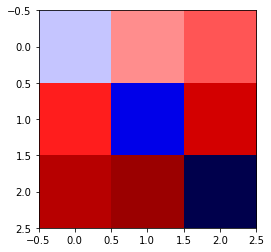

In [87]:
data = np.array([[-1, 2, 3],
                 [4, -5, 6],
                 [7, 8, -9]])

plt.imshow(data, cmap='seismic', vmin=-9, vmax=9)
plt.show()

Consider the following matrix:

$$
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 & 1 &\\
1 & 1 & 1 & 1 & 1 & 1 &\\
1 & 1 & 1 & 1 & 1 & 1 &\\
1 & 1 & 1 & 1 & 1 & 1 &\\
1 & 1 & 1 & 1 & 1 & 1 &\\
1 & 1 & 1 & 1 & 1 & 1 &\\
\end{bmatrix}
$$

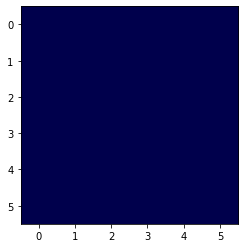

In [88]:
plt.imshow(np.ones((6,6)), cmap="seismic")
plt.show()

This matrix can be compressed as the product of two vectors:

$$
\begin{bmatrix}
1\\1\\1\\1\\1\\1
\end{bmatrix}
\begin{bmatrix}
1&1&1&1&1&1
\end{bmatrix}
$$

This is a **rank-1** matrix.

### The French flag

$$
\begin{bmatrix}
-1 & -1 & 0 & 0 & 1 & 1 &\\
-1 & -1 & 0 & 0 & 1 & 1 &\\
-1 & -1 & 0 & 0 & 1 & 1 &\\
-1 & -1 & 0 & 0 & 1 & 1 &\\
-1 & -1 & 0 & 0 & 1 & 1 &\\
-1 & -1 & 0 & 0 & 1 & 1 &\\
\end{bmatrix}
$$

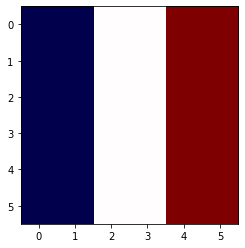

In [89]:
plt.imshow([
    [-1,-1,0,0,1,1],
    [-1,-1,0,0,1,1],
    [-1,-1,0,0,1,1],
    [-1,-1,0,0,1,1],
    [-1,-1,0,0,1,1],
    [-1,-1,0,0,1,1]
], cmap="seismic")

This is still a rank-1 matrix:

$$
\begin{bmatrix}
1\\1\\1\\1\\1\\1
\end{bmatrix}
\begin{bmatrix}
-1&-1&0&0&1&1
\end{bmatrix}
$$

Some more rank-1 matrices:

In [94]:
n = 50

A = np.random.uniform(size=n).reshape((n,1)) @ np.random.uniform(size=n).reshape((1,n))
#np.around(A,2)


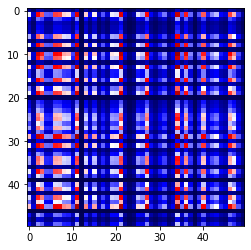

In [95]:
plt.imshow(A, cmap="seismic")

### Higher-rank matrices

$$
A = \begin{bmatrix}
1 & 0\\
1 & 1
\end{bmatrix} = \begin{bmatrix}1\\1\end{bmatrix}\begin{bmatrix}1&1\end{bmatrix}-
\begin{bmatrix}1\\0\end{bmatrix}\begin{bmatrix}0&1\end{bmatrix}
$$

We can trivially decompose every $m\times n$ matrix into $m$ rank-1 matrices:

$$
\begin{align}
\begin{bmatrix}
A_{1,\_}\\
\vdots\\
A_{m,\_}
\end{bmatrix} &= 
\begin{bmatrix}
1\\0\\\vdots \\ 0 
\end{bmatrix} A_{1,\_} + 
\begin{bmatrix}
0\\1\\\vdots \\ 0 
\end{bmatrix} A_{2,\_} + \cdots
\begin{bmatrix}
0\\0\\\vdots \\ 1
\end{bmatrix} A_{m,\_}
\end{align}
$$



A less trivial task: Given a matrix $A$, find the rank-1 matrix $B$ which minimizes the squared error
$$
\sum_{i,j} (a_{i,j}-b_{i,j})^2
$$

## Fast forward: some advanced linear algebra

- A matrix $S$ is called **symmetric** if $S = S^T$.
- A symmetric matrix $S$ is called **positive semidefinite** if for all vectors $\mathbf x$:
$$
\mathbf x^T S\mathbf x \geq 0
$$

### Theorem

For each matrix $A$, $A^TA$ and $AA^T$ are positive semidefinite.

### Theorem (Spectral Theorem)

For each symmetric $n\times n$ matricx $S$, there is an $n\times n$ matrix $U$ and an $n\times n$ diagonal matrix $\Lambda$ such that
$$
\begin{aligned}
    U^{-1} &= U^T\\
    S &= U\Lambda U^T
\end{aligned}
$$

If $S$ is positive semi-definite, all entries in $\Lambda$ are $\geq 0$.

We assume without loss of generality that the diagonal entries of $\Lambda$ are ordered in descending size.

The columns of $U$ are called **eigenvectors** and the diagonal entries of $\Lambda$ **eigenvalues**.

## Deriving the SVD

- Let $A$ be a non-zero $n\times m$ matrix, with $n\leq m$. 


- $AA^T$ is symmetric and positive semidefinite. Therefore there are $n\times n$ matries $U, \Lambda$ with

$$
\begin{aligned}
U^{-1} &= U^T\\
\Lambda &\mbox{ is a non-negative diagonal matrix, with entries in descending order}\\
AA^T &= U\Lambda U^T
\end{aligned}
$$

Let $\mathbf u_i$ be the $i$th column of $U$, $\lambda_i (=\Lambda_{i,i})\neq 0$, and let $\mathbf x_i = A^T\mathbf u_i$

$$
\begin{aligned}
\|\mathbf x_i\|^2 &= \|A^T \mathbf u_i\|^2\\
&= \mathbf u_i^T AA^T \mathbf u_i\\
&= \mathbf u_i^T \lambda_i \mathbf u_i\\
&= \lambda_i \mathbf u_i^T \mathbf u_i\\
&= \lambda_i \|\mathbf u_i^T\|^2\\
\|\mathbf x_i\| &= \sqrt{\lambda_i}\|\mathbf u_i^T\|\\
\sigma_i &\doteq \sqrt{\lambda_i}\\
\mathbf v_i &\doteq \frac{1}{\sigma_i} A^T\mathbf u_i
\end{aligned}
$$


Therefore all $\mathbf v_i$ are unit-vectors, i.e., $\|\mathbf v_i\|=1$.

Now let $i\neq j$ and $\lambda_i, \lambda_j\neq 0$.

$$
\begin{aligned}
\mathbf v_i^T \mathbf v_j &= (\frac{1}{\sigma_i}A^T\mathbf u_i)^T(\frac{1}{\sigma_j}A^T\mathbf u_j)\\
&= \frac{1}{\sigma_i\sigma_j}\mathbf u_i^T AA^T \mathbf u_j\\
&= \frac{1}{\sigma_i\sigma_j}\mathbf u_i^T \lambda_j \mathbf u_j\\
&= \frac{\sigma_j}{\sigma_i}\mathbf u_i^T \mathbf u_j\\
&= \mathbf 0
\end{aligned}
$$

So if $i\neq j$ and $\lambda_i, \lambda_j\neq 0$, $\mathbf u_i$ and $\mathbf u_j$ are perpendicular to each other.


Finally:
    
Let $\sigma_i\neq 0$. 
$$
\begin{aligned}
A^TA\mathbf v_i &= A^T A (\frac{1}{\sigma_i}A^T\mathbf u_i)\\
&= \frac{1}{\sigma_i}A^T A A^T\mathbf u_i\\
&= \frac{1}{\sigma_i}A^T (\lambda_i\mathbf u_i)\\
&= \sigma_i A^T \mathbf u_i\\
&= \lambda_i \mathbf v_i
\end{aligned}
$$

$AA^T$ and $A^TA$ have the same non-zero eigenvectors, and all $u_i$ are eigenvectors of $A^TA$.

### wrapping everything up

We have

$$A^T \mathbf u_i = \sigma_i \mathbf v_i$$

for all $i$ with $\sigma_i\neq 0$. $\mathbf u_i$ is an eigenvector of $AA^T$ and $\mathbf v_i$ an eigenvector of $A^TA$. 

If $\sigma_i=0$, then $\lambda_i=0$, i.e.

$$
AA^T \mathbf u_i = \mathbf 0
$$

We have

$$
\begin{aligned}
\|A^T\mathbf u_i\|^2 &= \mathbf u_i^TAA^T\mathbf u_i\\
&= 0\\
A^T\mathbf u_i &= \mathbf 0
\end{aligned}
$$

Therefore, even if $\sigma_i=0$:

$$A^T \mathbf u_i = \sigma_i \mathbf v_i$$

We can combine this for all $i$ to get

$$
A^T U = 
\begin{bmatrix}
\mathbf v_i \cdots \mathbf v_n
\end{bmatrix}\Sigma_{1\cdots n} 
$$

Where $\Sigma_{1\cdots n}$ is an $n\times n$ diagonal matrix with $\sigma_i$ in the $i$th diagonal cell.

If $m>n$ we can add all eigenvectors of $A^TA$ to $\begin{bmatrix}
\mathbf v_i \cdots \mathbf v_n
\end{bmatrix}$
which correspond to the eigenvector $0$. This completes the eigenvector matrix of $A^TA$.

Likewise, we extend $\Sigma_{1\cdots n}$ to an $m\times n$ matrix $\Sigma^T$ by adding all-zero rows at the end.

This yields:

$$
\begin{aligned}
A^TU &= V\Sigma^T \\
A^T &= V\Sigma^T U^T\\
A &= U\Sigma V^T
\end{aligned}
$$


The last line is the **Singular Value Decomposition** of the matrix $A$.

The rank-1 matrix closest to $A$ is constructed by keeping $\sigma_1$ and setting all other cells in $\Sigma$ to 0.

Likewise, the rank-2 matrix closest to $A$ is constructed by keeping $\sigma_1$ and $\sigma_2$ and setting all other cells in $\Sigma$ to 0 etc.

Here is a nice demo: http://timbaumann.info/svd-image-compression-demo/